### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Valor Venda
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,228.329790
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,267.584305
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,300.772681
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,1064.657344
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,473.954689


#1. Análise do faturamento


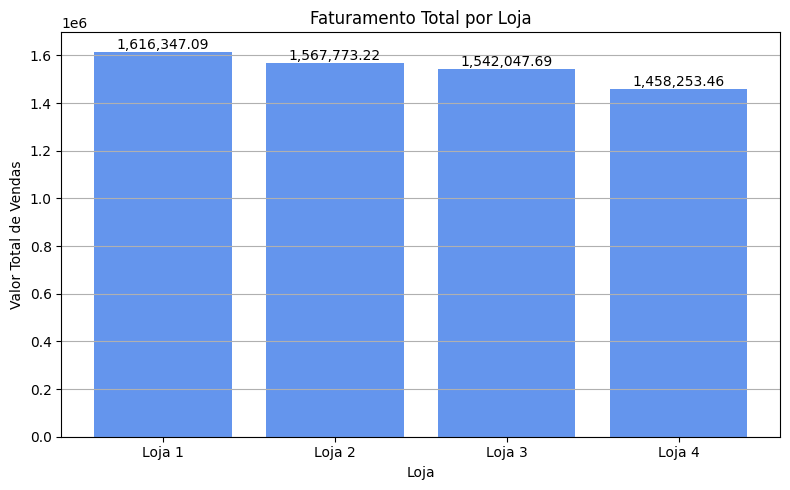

In [ ]:
faturamento = {
    'Loja 1': (loja1['Preço'] + loja1['Frete']).sum(),
    'Loja 2': (loja2['Preço'] + loja2['Frete']).sum(),
    'Loja 3': (loja3['Preço'] + loja3['Frete']).sum(),
    'Loja 4': (loja4['Preço'] + loja4['Frete']).sum(),
}

plt.figure(figsize=(8,5))
bars = plt.bar(faturamento.keys(), faturamento.values(), color='cornflowerblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Valor Total de Vendas')
plt.grid(axis='y')

for bar in bars:
    valores = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, valores + 100, f'{valores:,.2f}', ha='center', va='bottom') #isso aqui é pros numeros aparecerem nas barras

plt.tight_layout()
plt.show()

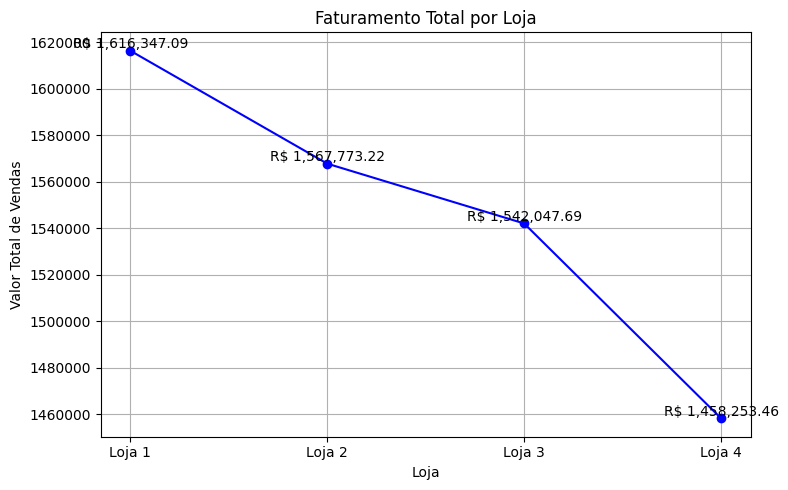

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(list(faturamento.keys()), list(faturamento.values()), marker='o', linestyle='-', color='blue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Valor Total de Vendas')
plt.grid(True)

for i, valor in enumerate(faturamento.values()):
    plt.text(i, valor + 1000, f'R$ {valor:,.2f}', ha='center') #isso aqui é pros numeros aparecerem nos pontinohs

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

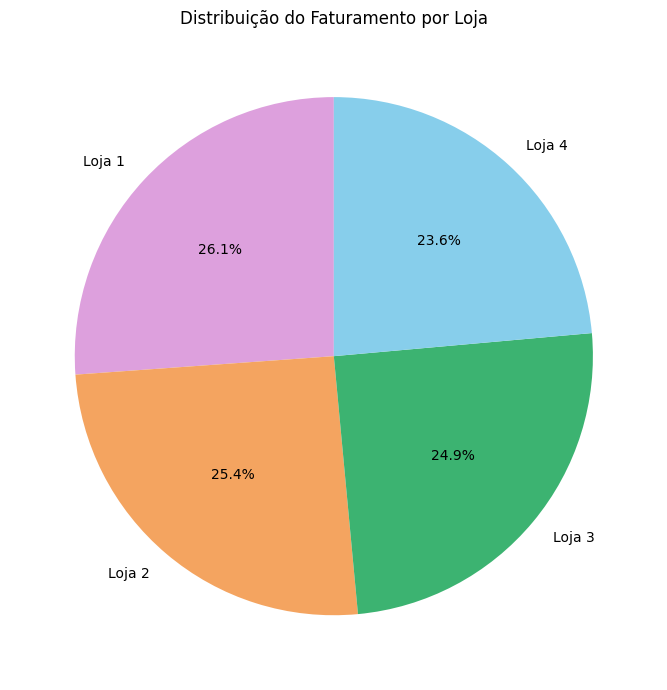

In [ ]:
cor_grafico = ['plum', 'sandybrown', 'mediumseagreen', 'skyblue']

plt.figure(figsize=(7,7))
plt.pie(faturamento.values(), labels=faturamento.keys(), autopct='%1.1f%%', startangle=90, colors=cor_grafico)
plt.title('Distribuição do Faturamento por Loja')
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [ ]:
loja1['Valor Venda'] = loja1['Preço'] + loja1['Frete']
faturamento_categoria1 = loja1.groupby('Categoria do Produto')['Valor Venda'].sum().sort_values()

loja2['Valor Venda'] = loja2['Preço'] + loja2['Frete']
faturamento_categoria2 = loja2.groupby('Categoria do Produto')['Valor Venda'].sum().sort_values()

loja3['Valor Venda'] = loja3['Preço'] + loja3['Frete']
faturamento_categoria3 = loja3.groupby('Categoria do Produto')['Valor Venda'].sum().sort_values()

loja4['Valor Venda'] = loja4['Preço'] + loja4['Frete']
faturamento_categoria4 = loja4.groupby('Categoria do Produto')['Valor Venda'].sum().sort_values()

Categoria do Produto
livros                    12336.410244
utilidades domesticas     17789.381598
brinquedos                25299.265959
esporte e lazer           55216.657567
instrumentos musicais    128243.495861
moveis                   263505.317336
eletrodomesticos         510678.320571
eletronicos              603278.238660
Name: Valor Venda, dtype: float64
Categoria do Produto
livros                    14195.836448
utilidades domesticas     20731.111659
brinquedos                22445.828832
esporte e lazer           48828.896941
instrumentos musicais    147397.090812
moveis                   247817.049515
eletrodomesticos         489499.129045
eletronicos              576858.274761
Name: Valor Venda, dtype: float64
Categoria do Produto
livros                    13326.377563
utilidades domesticas     21163.465865
brinquedos                27258.598348
esporte e lazer           50020.617735
instrumentos musicais    108652.544679
moveis                   282475.234825
eletrodomes

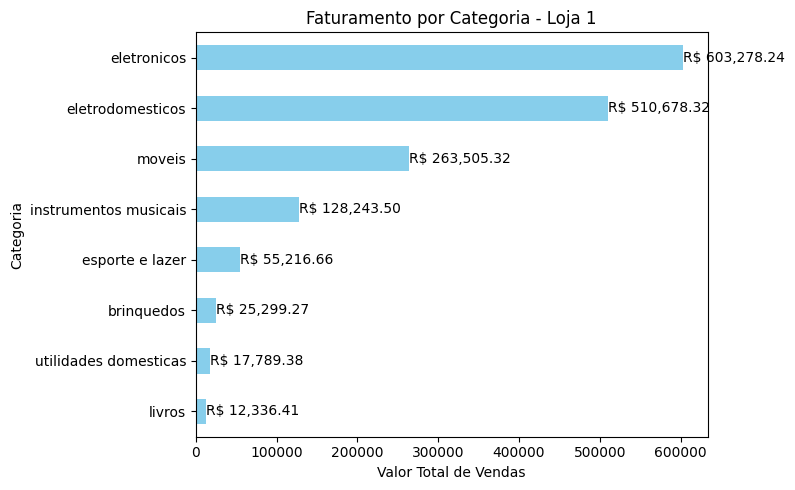

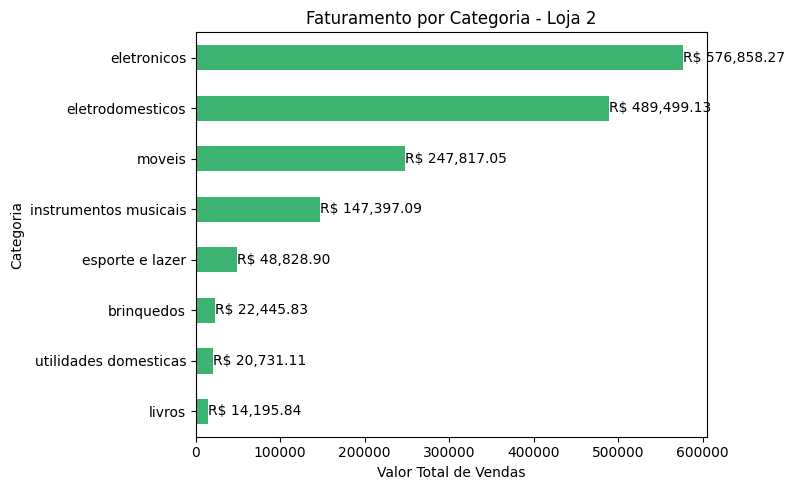

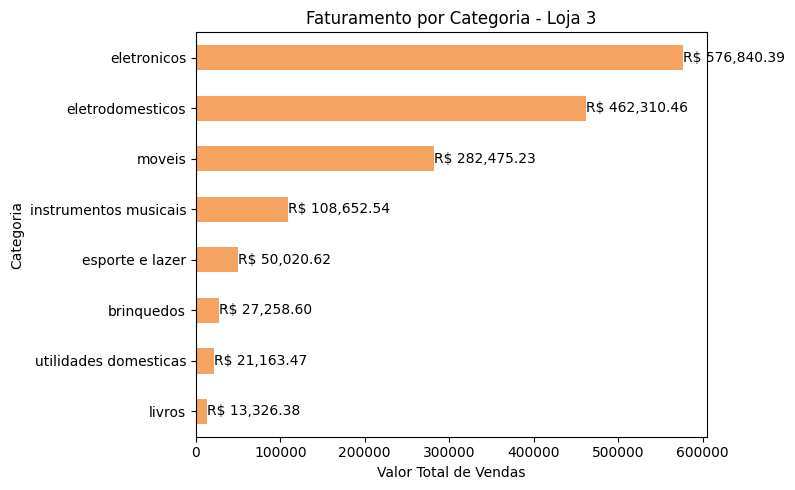

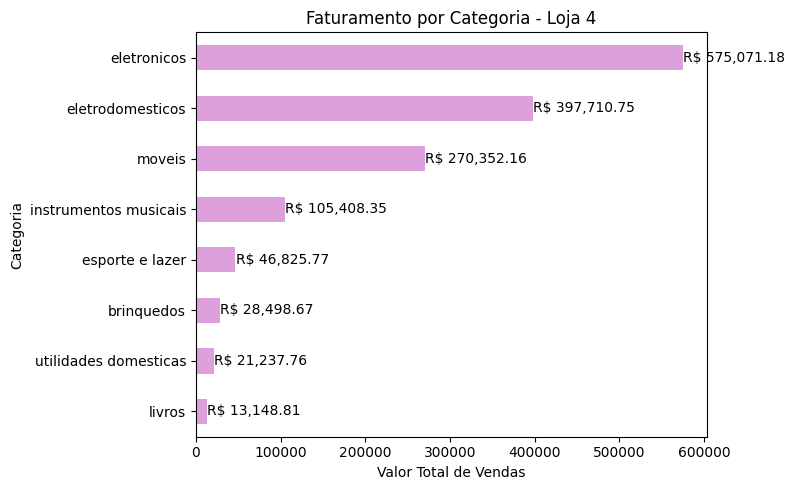

In [ ]:
def gerar_grafico(faturamento_categoria, nome_daLoja, cor):
    plt.figure(figsize=(8, 5))
    ax = faturamento_categoria.plot(kind='barh', color=cor)
    plt.title(f'Faturamento por Categoria - {nome_daLoja}')
    plt.xlabel('Valor Total de Vendas')
    plt.ylabel('Categoria')

    for i, valor in enumerate(faturamento_categoria):
        plt.text(valor + 100, i, f'R$ {valor:,.2f}', va='center')

    plt.tight_layout()
    plt.show()

print(faturamento_categoria1)
print(faturamento_categoria2)
print(faturamento_categoria3)
print(faturamento_categoria4)

gerar_grafico(faturamento_categoria1, 'Loja 1', 'skyblue')
gerar_grafico(faturamento_categoria2, 'Loja 2', 'mediumseagreen')
gerar_grafico(faturamento_categoria3, 'Loja 3', 'sandybrown')
gerar_grafico(faturamento_categoria4, 'Loja 4', 'plum')

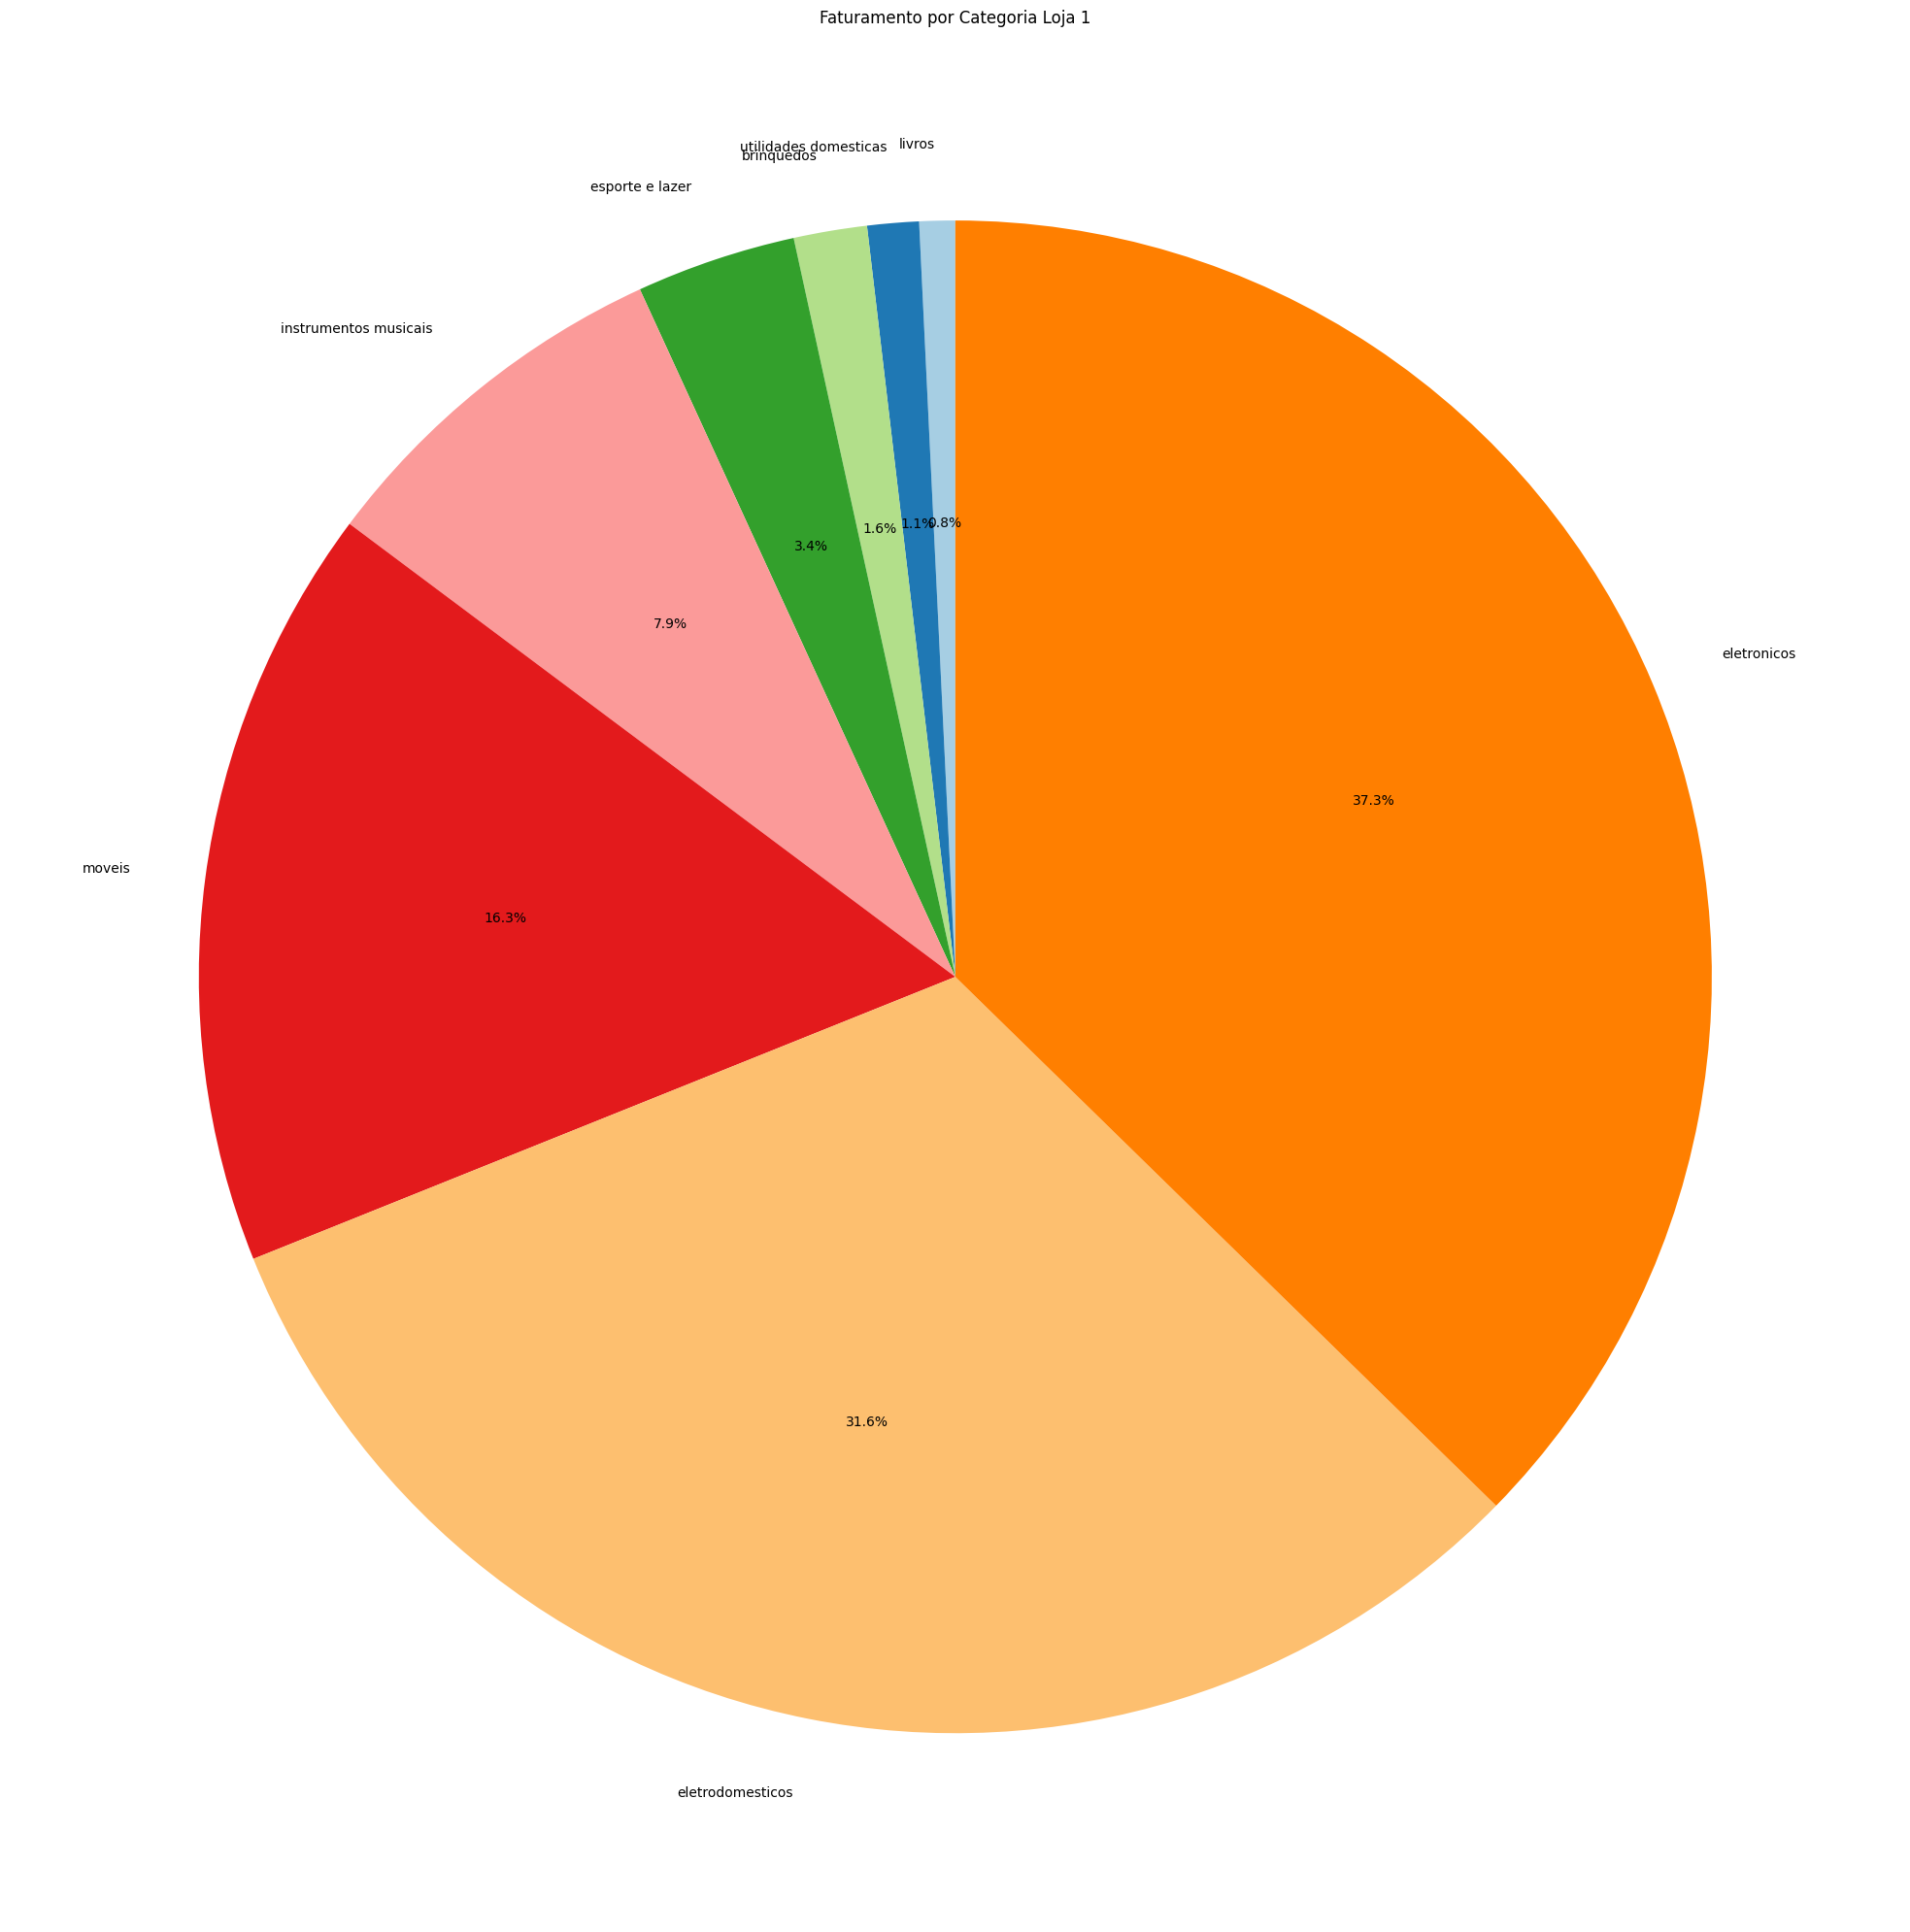

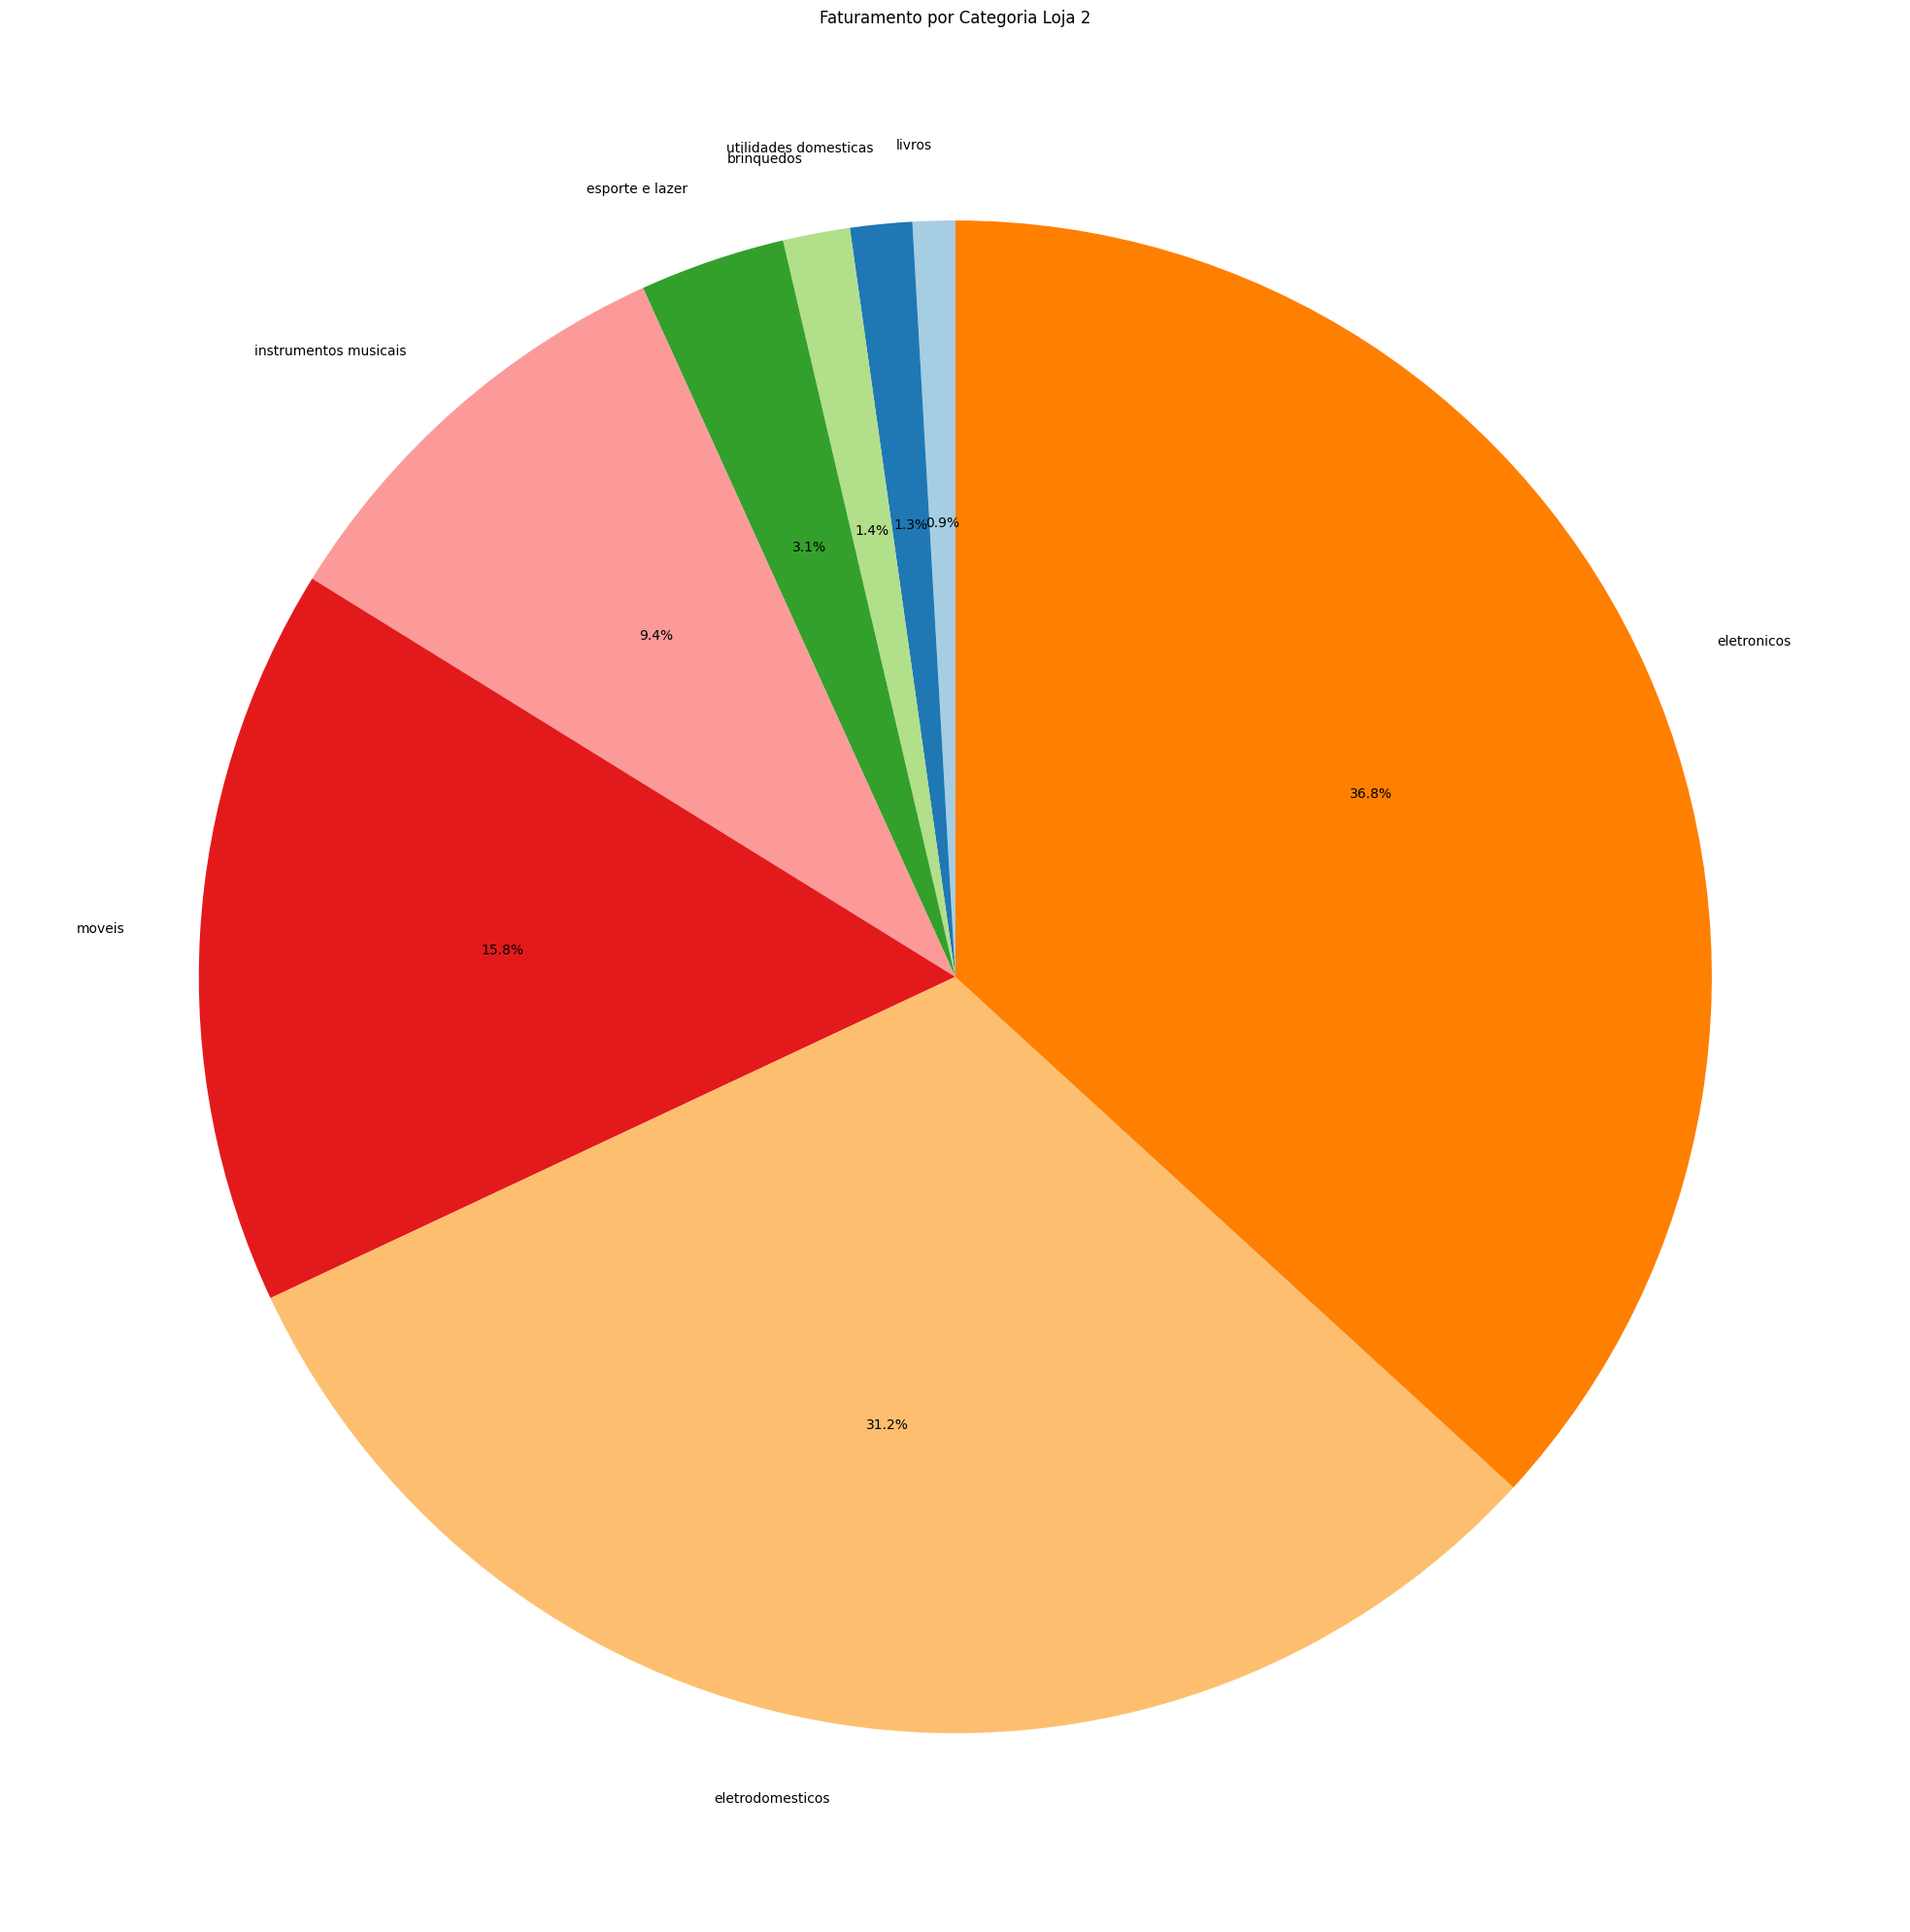

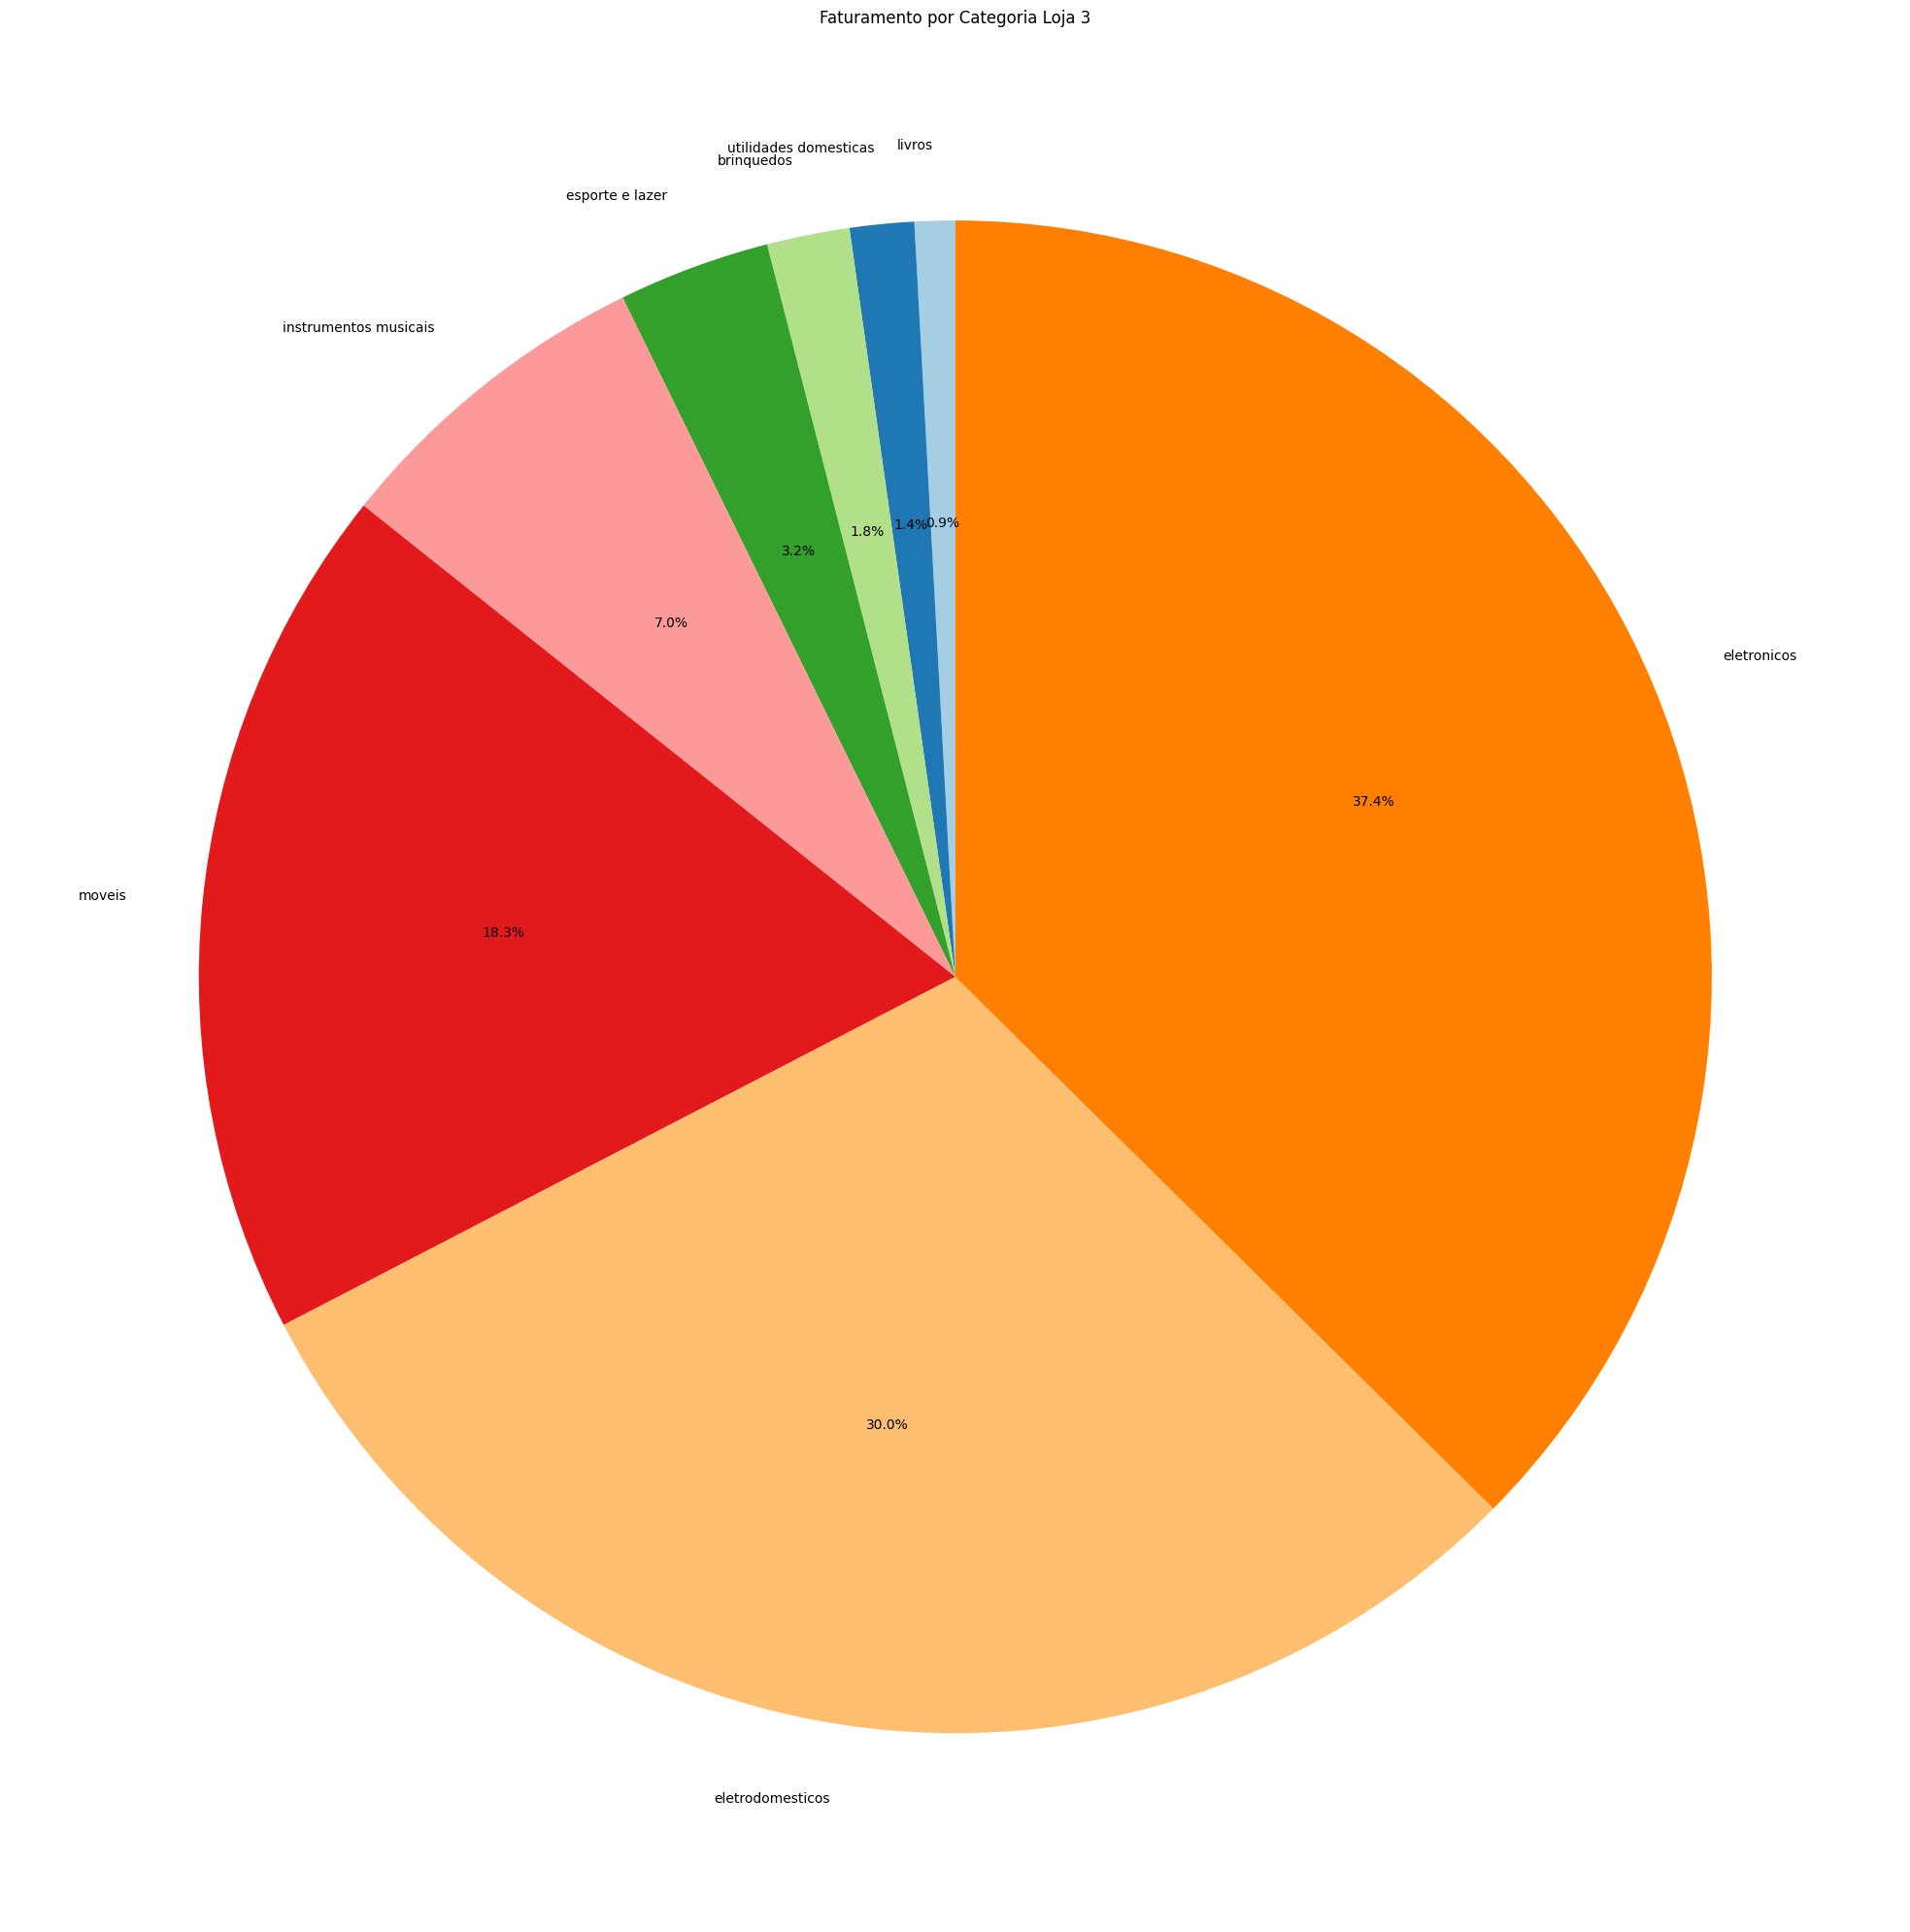

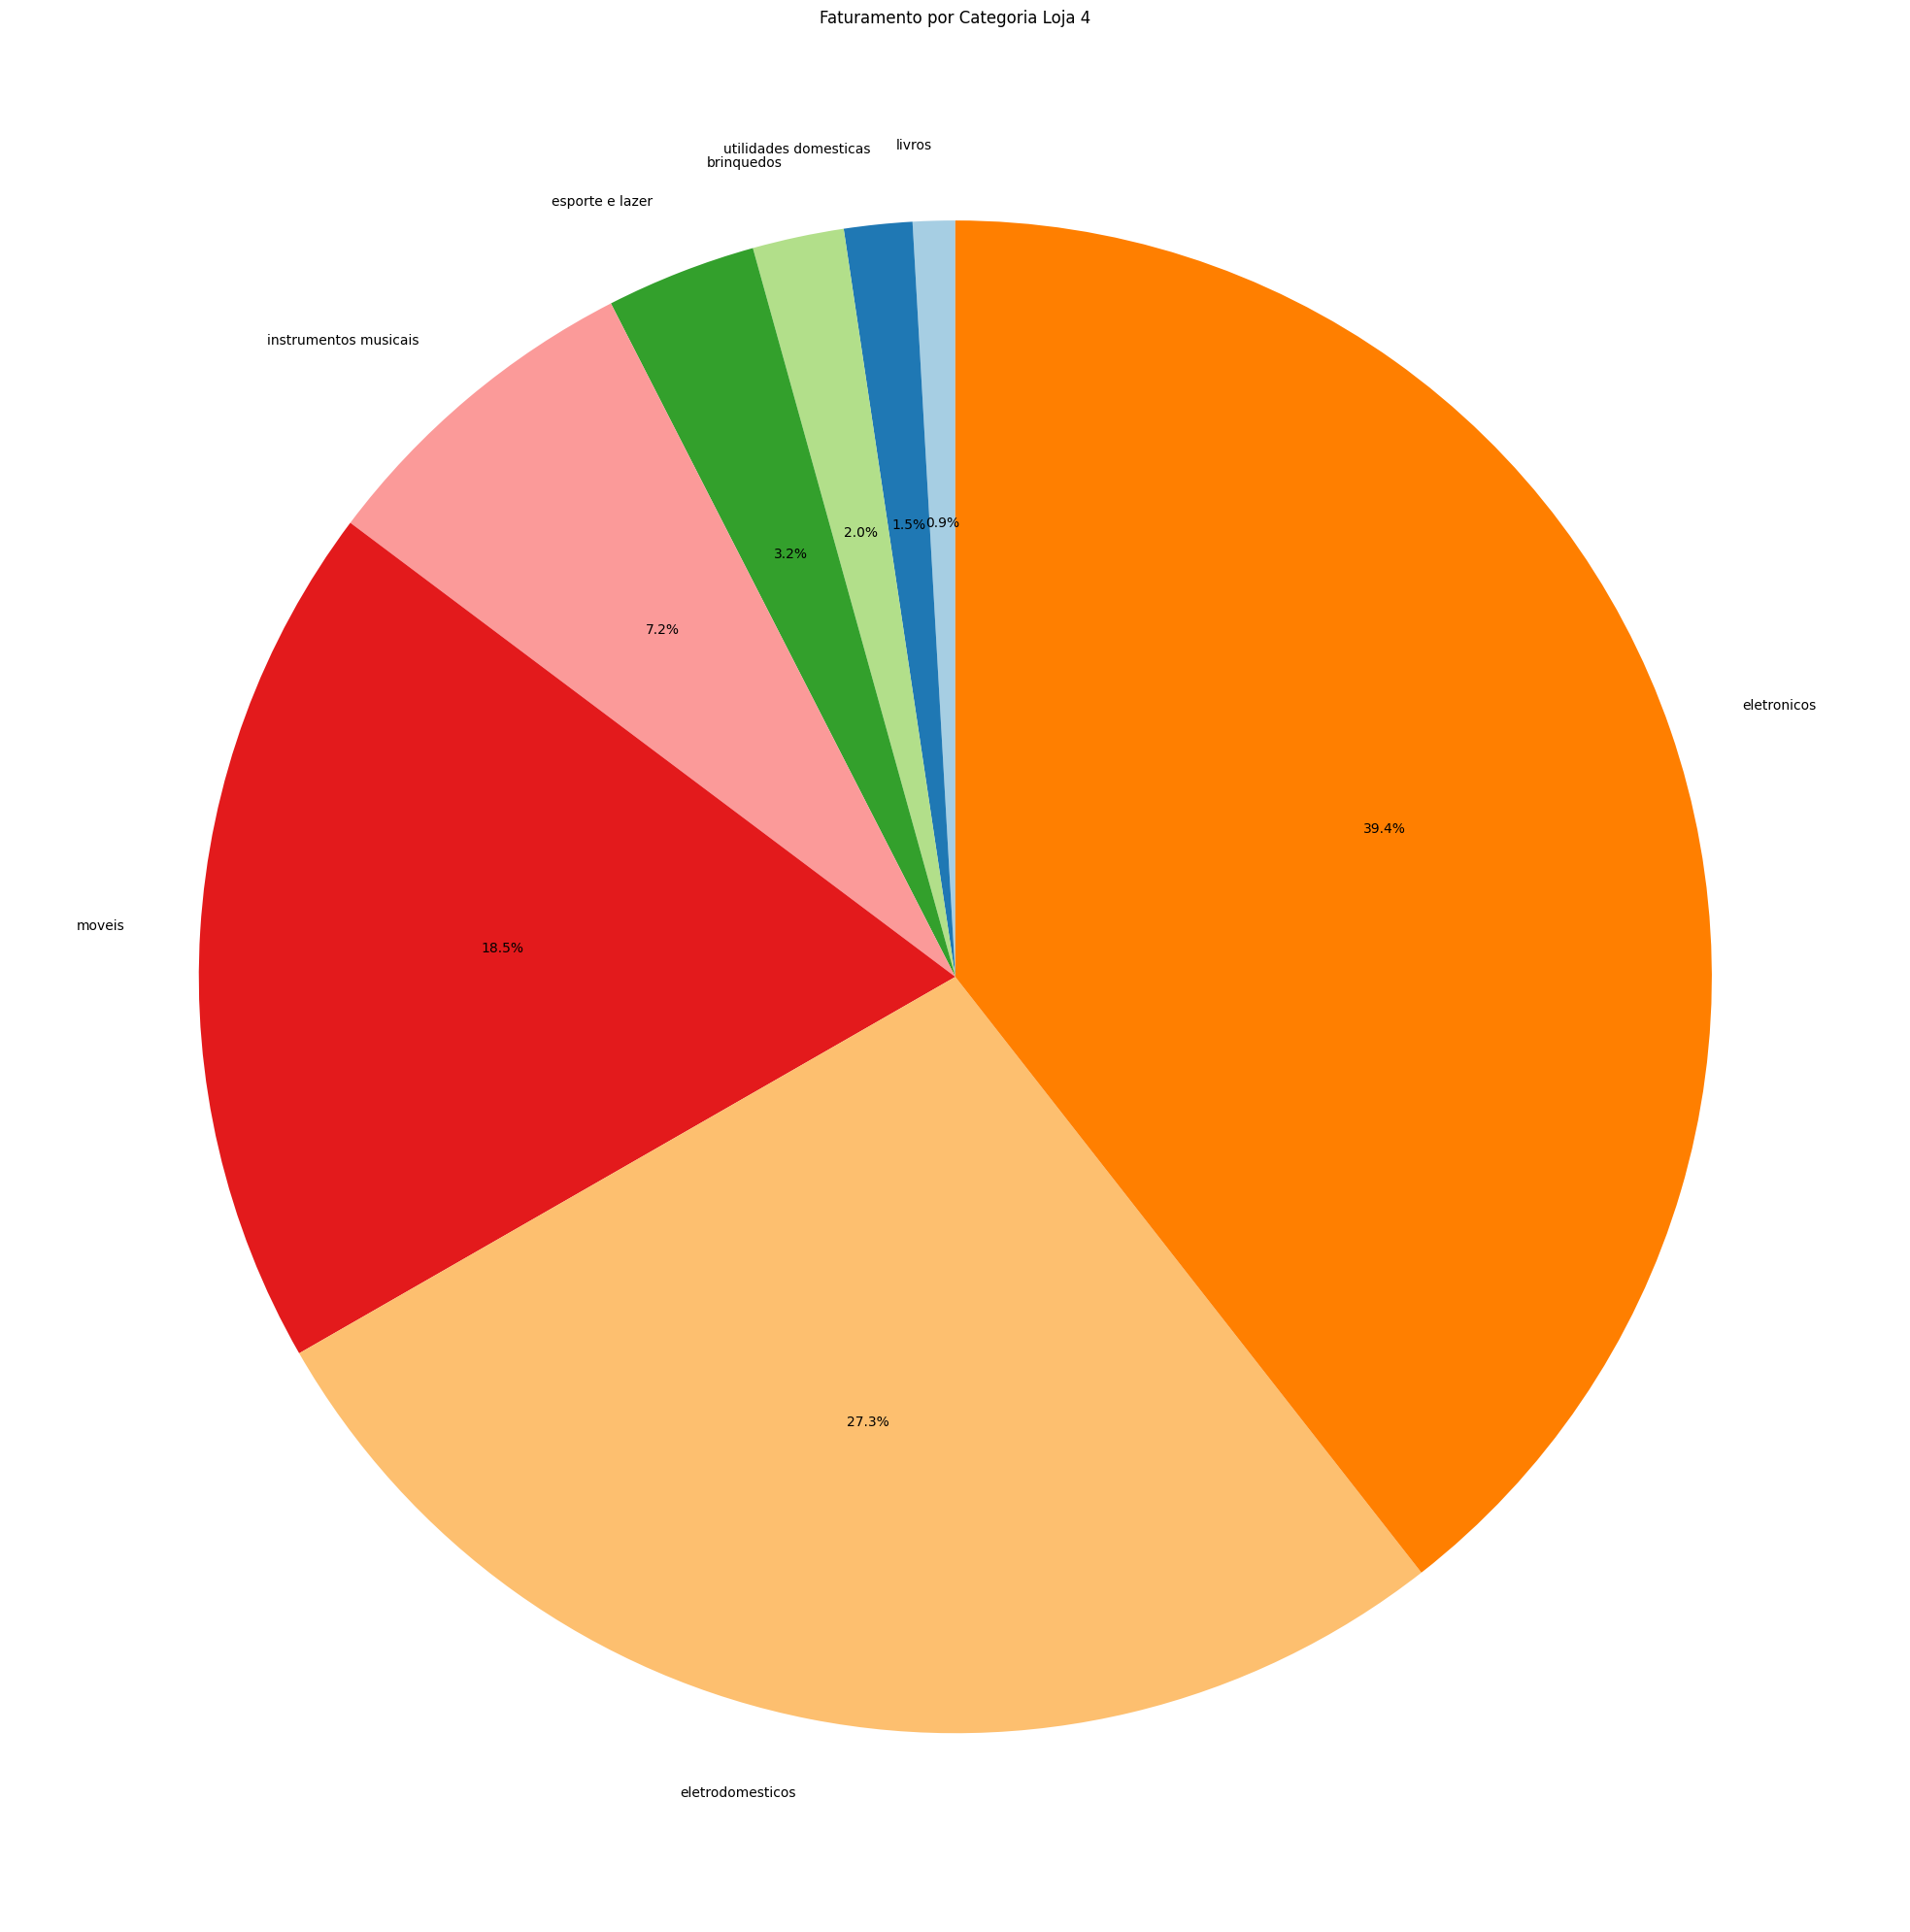

In [ ]:
plt.figure(figsize=(20, 20))
plt.pie(faturamento_categoria1, labels=faturamento_categoria1.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Faturamento por Categoria Loja 1')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 20))
plt.pie(faturamento_categoria2, labels=faturamento_categoria2.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Faturamento por Categoria Loja 2')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 20))
plt.pie(faturamento_categoria3, labels=faturamento_categoria3.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Faturamento por Categoria Loja 3')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 20))
plt.pie(faturamento_categoria4, labels=faturamento_categoria4.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Faturamento por Categoria Loja 4')
plt.tight_layout()
plt.show()

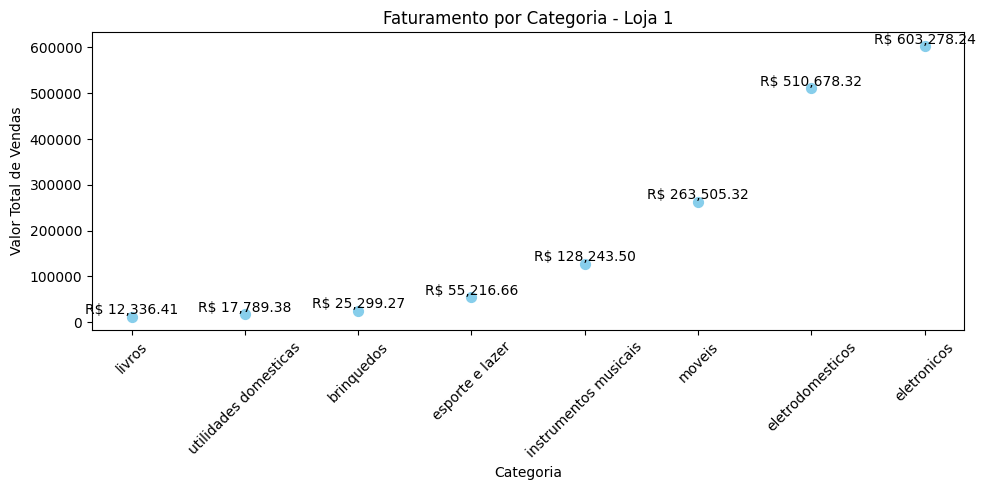

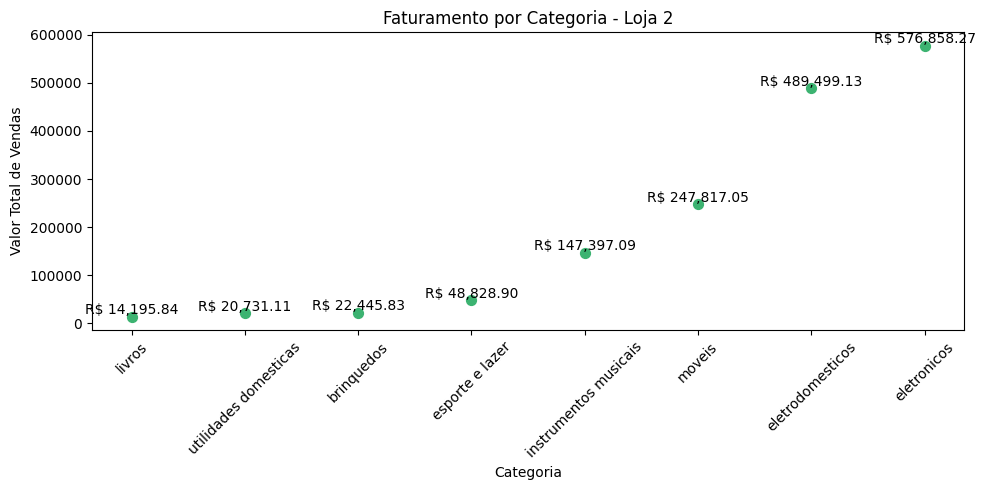

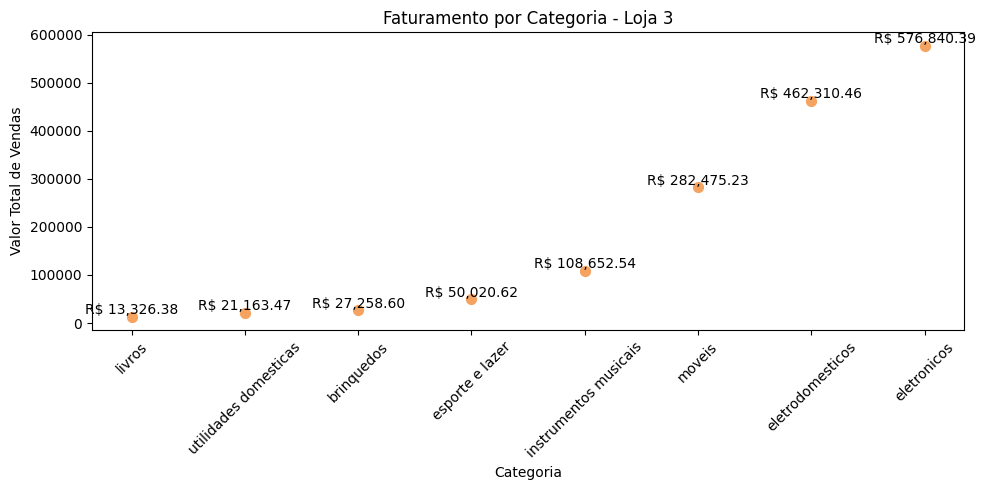

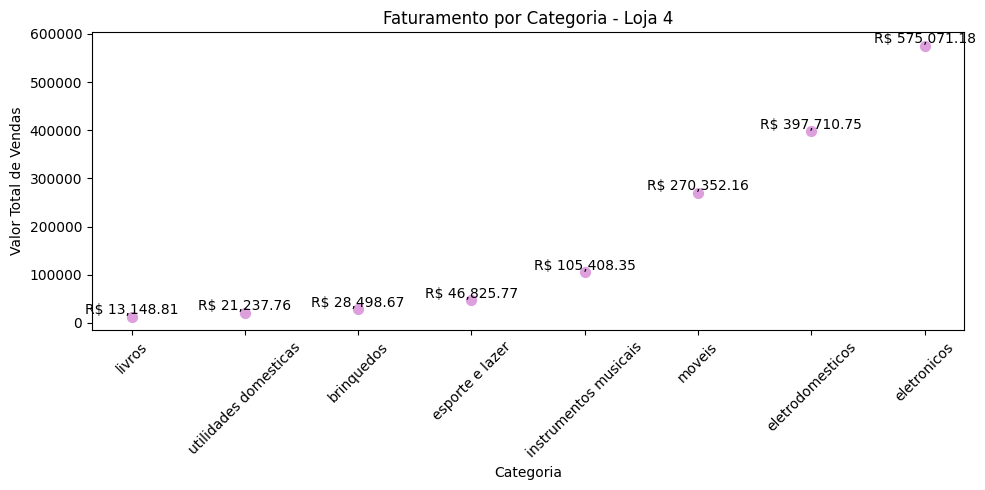

In [ ]:
def grafico_dispersao_categoria(faturamento_categoria, nome_daLoja, cor):
  plt.figure(figsize=(10, 5))
  plt.scatter(faturamento_categoria.index, faturamento_categoria.values, color=cor, s=50)
  plt.title(f'Faturamento por Categoria - {nome_daLoja}')
  plt.xlabel('Categoria')
  plt.ylabel('Valor Total de Vendas')

  for i, valor in enumerate(faturamento_categoria.values):
    plt.text(faturamento_categoria.index[i], valor + 5000, f'R$ {valor:,.2f}', ha='center')

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

grafico_dispersao_categoria(faturamento_categoria1, 'Loja 1', 'skyblue')
grafico_dispersao_categoria(faturamento_categoria2, 'Loja 2', 'mediumseagreen')
grafico_dispersao_categoria(faturamento_categoria3, 'Loja 3', 'sandybrown')
grafico_dispersao_categoria(faturamento_categoria4, 'Loja 4', 'plum')

# 3. Média de Avaliação das Lojas

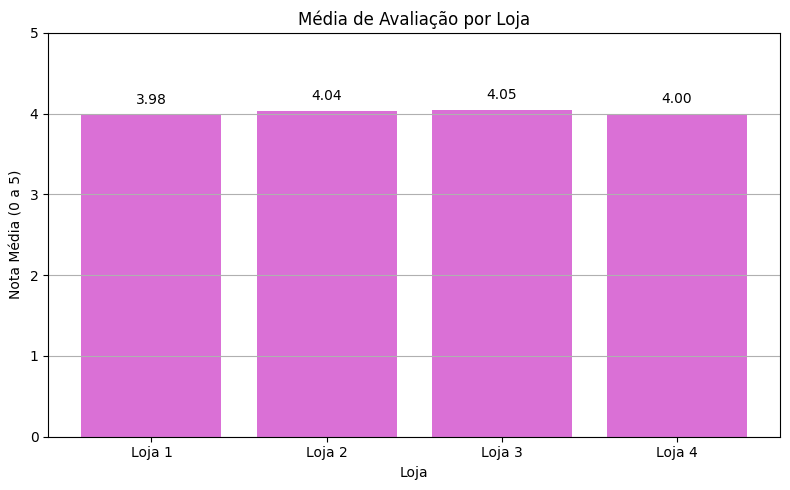

In [ ]:
avaliacoes = {
    'Loja 1': loja1['Avaliação da compra'].mean()
    ,'Loja 2': loja2['Avaliação da compra'].mean(),

    'Loja 3': loja3['Avaliação da compra'].mean()
   , 'Loja 4': loja4['Avaliação da compra'].mean()
}

plt.figure(figsize=(8, 5))
bars = plt.bar(avaliacoes.keys(), avaliacoes.values(), color='orchid')
plt.title('Média de Avaliação por Loja')
plt.xlabel('Loja')
plt.ylabel('Nota Média (0 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y')

for bar in bars:
    nota = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, nota + 0.1, f'{nota:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

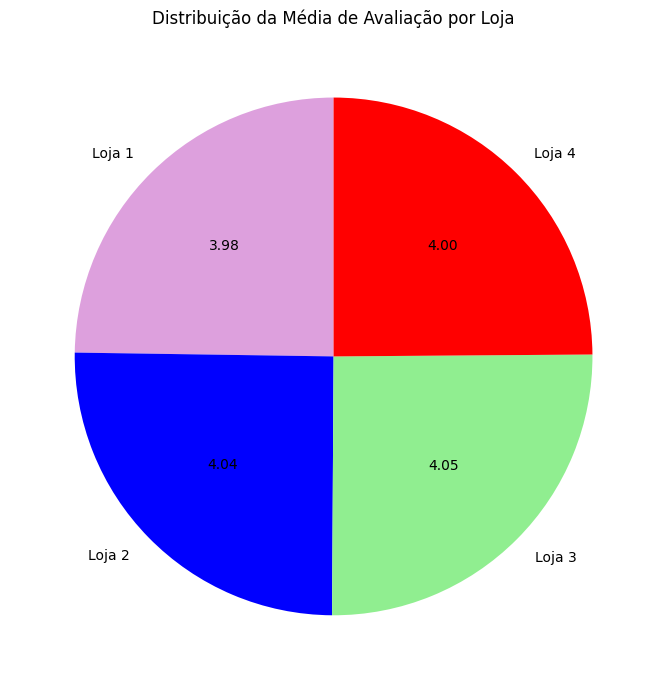

In [ ]:
cores = ['plum', 'blue', 'lightgreen', 'red']

def mostrar_valor(porcentagem, medias):
    valor = porcentagem * sum(medias) / 100
    return f'{valor:.2f}'

plt.figure(figsize=(7, 7))
plt.pie(avaliacoes.values(), labels=avaliacoes.keys(), autopct=lambda porcentagem: mostrar_valor(porcentagem, list(avaliacoes.values())), startangle=90, colors=cores)
plt.title('Distribuição da Média de Avaliação por Loja')
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

 **Esse tópico não tem sentido para o problema, então irei pular*

# 5. Frete Médio por Loja


In [ ]:
frete_medio = {
    'Loja 1': loja1['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

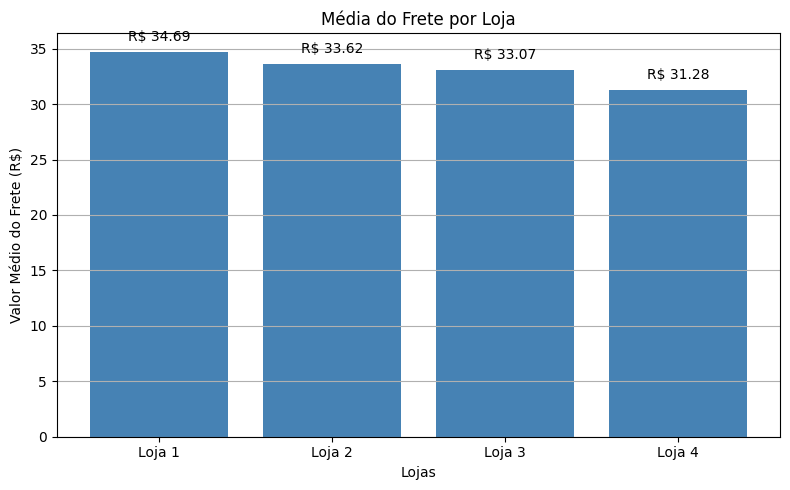

In [ ]:
plt.figure(figsize=(8, 5))
bars = plt.bar(frete_medio.keys(), frete_medio.values(), color='steelblue')
plt.title('Média do Frete por Loja')
plt.xlabel('Lojas')
plt.ylabel('Valor Médio do Frete (R$)')
plt.grid(axis='y')

for bar in bars:
    valor = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, valor + 1, f'R$ {valor:.2f}', ha='center')

plt.tight_layout()
plt.show()

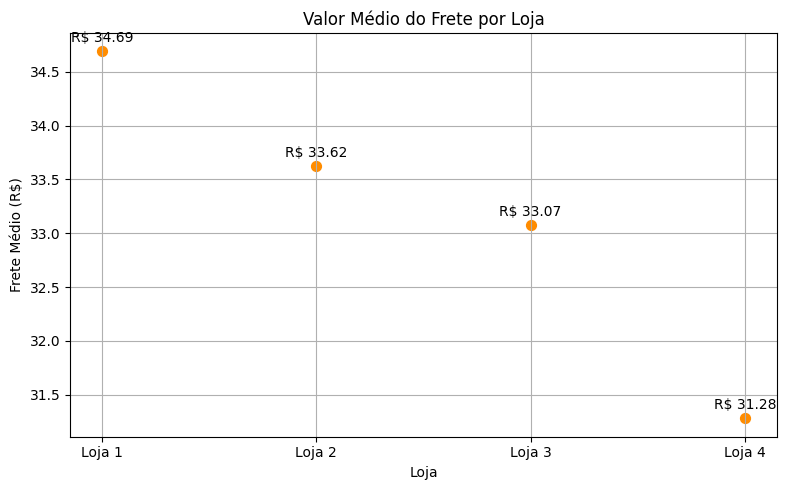

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(frete_medio.keys(), frete_medio.values(), color='darkorange', s=50)
plt.title('Valor Médio do Frete por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.grid(True)

for loja, valor in frete_medio.items():
    plt.text(loja, valor + 0.09, f'R$ {valor:.2f}', ha='center')

plt.tight_layout()
plt.show()

# Relatório

Com base na análise dos dados de faturamento, avaliações dos clientes e frete médio das quatro lojas, podemos observar os seguintes pontos:

* **Faturamento Total:** A Loja 4 apresentou o menor faturamento total em comparação com as outras lojas e essa é o principal motivo para manter uma loja ou não.
* **Média de Avaliação:** As médias de avaliação das quatro lojas são bem próximas e sendo sincero, não acredito que seja o melhor motivo para saber se uma loja deve ou não ser vendida comparado com o quanto de lucro ela está gerando, maaaas... De qualquer forma a Loja 1 acaba tendo a menor média, apesar da diferença ser mínima.
* **Frete Médio:** Dentre as quatro lojas analisadas, a Loja 4 apresentou a menor média de preço no frete dos produtos. Olhando como um cliente, um frete menor acaba chamando mais atenção e pode ser um ponto principal para finalizar uma compra, o que pode indicar mais compras naquela loja, mas, como visto anteriormente, ela é a loja que menos lucra dentre as outras, e isso pode indicar que a Loja 4 pode até estar vendendo sim mais produtos, mas ela está vendendendo produtos de baixo valor(preço), ou produtos que tem custos de frete menos eficientes em relação ao valor dos produtos(vendendo com um valor razoavel mas com o frete muito barato).

Considerando o faturamento total, que é um indicador crucial de desempenho financeiro para se manter uma empresa, a **Loja 4** é a que menos contribui no geral. Apesar dela não ter um desempenho negativo na média de avaliação e o frete médio(de forma significativa), o menor faturamento faz ela ser a candidata mais provável a ser vendida.

**Recomendação pro seu José:**

Com base exclusivamente nos dados analisados **Loja 4** seria a menos vantajosa para manter e, portanto, ela poderia ser a escolhida para a venda.